In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
apache=pd.read_csv("apache.csv")

In [4]:
apache.head()

,Unnamed: 0,patientunitstayid,sicuday,saps3day1,saps3today,saps3yesterday,gender,teachtype,region,bedcount,admitsource,graftcount,age,admitdiagnosis,thrombolytics,diedinhospital,aids,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,electivesurgery,activetx,readmit,ima,midur,ventday1,oobventday1,oobintubday1,diabetes,managementsystem,var03hspxlos,ejectfx,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2,intubated,vent,dialysis,eyes_y,motor_y,verbal_y,meds_y,urine,wbc,temperature,respiratoryrate,sodium,heartrate,meanbp,ph,hematocrit,creatinine_y,albumin,pao2_y,pco2,bun,glucose,bilirubin,fio2_y,physicianinterventioncategory,acutephysiologyscore,apachescore,actualiculos,actualhospitallos,preopmi,preopcardiaccath,ptcawithin24h,unabridgedunitlos,unabridgedhosplos,actualventdays,predventdays,unabridgedactualventdays
0,0,141765,1,0,0,0,1,0,3,12,8,3,87.0,RHYTHATR,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,1,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,10.2,36.2,39,139.0,88,108,-1.0,37.8,1.04,-1.0,-1.0,-1.0,28.0,61,-1.0,-1,Unknown,23,47,1.5625,1.8222,0,0,0,1.5625,1.8222,NaN,NaN,NaN
1,1,143870,1,0,0,0,0,0,3,14,1,3,76.0,S-CAROTEND,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,11.7,36.4,60,133.0,40,47,-1.0,34.1,1.14,-1.0,-1.0,-1.0,14.0,140,-1.0,-1,Unknown,43,60,0.5506,0.8465,0,0,0,0.5506,0.8465,NaN,NaN,NaN
2,2,144815,1,0,0,0,1,0,3,8,8,3,34.0,ODOTHER,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,1,0,-1,8,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,7.9,36.7,6,141.0,131,61,-1.0,36.6,0.63,3.6,-1.0,-1.0,6.0,82,0.5,-1,I,25,25,0.7784,0.8063,0,0,0,0.7784,0.8063,NaN,NaN,NaN
3,3,145427,1,0,0,0,0,0,3,14,1,3,61.0,S-GIPERFOR,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,21.1,36.2,41,141.0,49,72,-1.0,40.4,1.05,-1.0,-1.0,-1.0,14.0,118,-1.0,-1,Unknown,26,37,0.9506,3.6618,0,0,0,0.9506,3.6618,NaN,NaN,NaN
4,4,147307,1,0,0,0,1,0,3,43,1,3,55.0,S-CAROTEND,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,1,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,-1.0,36.8,33,-1.0,115,107,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1,Unknown,15,20,0.3305,0.7674,0,0,0,0.3305,0.7674,NaN,NaN,NaN


In [5]:
apache=apache.drop("Unnamed: 0", axis=1)

In [6]:
#

In [7]:
carePlan=pd.read_csv("carePlanGeneral.csv.gz", compression='gzip')

In [524]:
carePlan["cplitemvalue"]

0                                                Spontaneous - adequate
1                                                          Full therapy
2                                                 Proton pump inhibitor
3                                           Not intubated/normal airway
4                                                   Compression devices
5                                                         Not indicated
6                                           Not intubated/normal airway
7                                                          Full therapy
8                                                   Compression devices
9                                                Spontaneous - adequate
10                                                                Chair
11                                                      H-2 antagonists
12                                                   Assess safety risk
13                         Normovolemic - maintenance therapy in

In [8]:
care=carePlan[["patientunitstayid", "cplgroup", "cplitemoffset"]]

In [9]:
care.head()

,patientunitstayid,cplgroup,cplitemoffset
0,174826,Ventilation,49
1,174826,Care Limitation,49
2,174826,Stress Ulcer Prophylaxis,49
3,174826,Airway,49
4,174826,DVT Prophylaxis,49


In [10]:
# Group the data by patient ID and calculate the length of treatment
grouped = care.groupby("patientunitstayid").agg({'cplitemoffset': ['min', 'max']})

# Calculate the length of treatment for each patient in hours
grouped['lentreatment'] = (grouped['cplitemoffset', 'max'] - grouped['cplitemoffset', 'min'])


In [11]:
grouped = grouped.reset_index()
grouped = grouped.loc[:, ['patientunitstayid', 'lentreatment']]


In [13]:
grouped.head()

,patientunitstayid,lentreatment
,,
0,141764,0
1,141765,871
2,143870,3
3,144815,260
4,145427,125


In [14]:
data=pd.merge(apache, grouped, on="patientunitstayid")

C:\Users\User\AppData\Local\Temp\ipykernel_9624\1185996517.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  data=pd.merge(apache, grouped, on="patientunitstayid")
C:\Users\User\AppData\Local\Temp\ipykernel_9624\1185996517.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data=pd.merge(apache, grouped, on="patientunitstayid")


In [15]:
data["lentreatment"]=data[('lentreatment', '')]

In [16]:
data.drop(('lentreatment', ''),axis=1, inplace=True)

In [20]:
data.head()

,patientunitstayid,gender,bedcount,admitsource,graftcount,age,admitdiagnosis,thrombolytics,diedinhospital,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,activetx,readmit,ima,midur,ventday1,oobventday1,oobintubday1,diabetes,ejectfx,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2,intubated,vent,dialysis,eyes_y,motor_y,verbal_y,meds_y,urine,wbc,temperature,respiratoryrate,sodium,heartrate,meanbp,ph,hematocrit,creatinine_y,albumin,pao2_y,pco2,bun,glucose,bilirubin,fio2_y,physicianinterventioncategory,acutephysiologyscore,apachescore,actualiculos,actualhospitallos,preopmi,preopcardiaccath,ptcawithin24h,actualventdays,lentreatment
0,141765,1,12,8,3,87.0,RHYTHATR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,10.2,36.2,39,139.0,88,108,-1.0,37.8,1.04,-1.0,-1.0,-1.0,28.0,61,-1.0,-1,Unknown,23,47,1.5625,1.8222,0,0,0,NaN,871
1,143870,0,14,1,3,76.0,S-CAROTEND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,11.7,36.4,60,133.0,40,47,-1.0,34.1,1.14,-1.0,-1.0,-1.0,14.0,140,-1.0,-1,Unknown,43,60,0.5506,0.8465,0,0,0,NaN,3
2,144815,1,8,8,3,34.0,ODOTHER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,8,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,7.9,36.7,6,141.0,131,61,-1.0,36.6,0.63,3.6,-1.0,-1.0,6.0,82,0.5,-1,I,25,25,0.7784,0.8063,0,0,0,NaN,260
3,145427,0,14,1,3,61.0,S-GIPERFOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,21.1,36.2,41,141.0,49,72,-1.0,40.4,1.05,-1.0,-1.0,-1.0,14.0,118,-1.0,-1,Unknown,26,37,0.9506,3.6618,0,0,0,NaN,125
4,147307,1,43,1,3,55.0,S-CAROTEND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,-1.0,36.8,33,-1.0,115,107,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1,Unknown,15,20,0.3305,0.7674,0,0,0,NaN,0


In [17]:
data.drop(["electivesurgery","unabridgedactualventdays","predventdays","unabridgedunitlos", "unabridgedhosplos",
            "saps3today", "sicuday", "saps3today", "saps3yesterday","saps3day1", "teachtype", "region",
            "managementsystem", "var03hspxlos","aids"], axis=1, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientunitstayid              1827 non-null   int64  
 1   gender                         1827 non-null   int64  
 2   bedcount                       1827 non-null   int64  
 3   admitsource                    1827 non-null   int64  
 4   graftcount                     1827 non-null   int64  
 5   age                            1754 non-null   float64
 6   admitdiagnosis                 1816 non-null   object 
 7   thrombolytics                  1827 non-null   int64  
 8   diedinhospital                 1827 non-null   int64  
 9   hepaticfailure                 1827 non-null   int64  
 10  lymphoma                       1827 non-null   int64  
 11  metastaticcancer               1827 non-null   int64  
 12  leukemia                       1827 non-null   i

In [436]:
sickness_group = data.groupby('admitdiagnosis')['actualiculos'].mean()
sickness_group_sorted = sickness_group.sort_values(ascending=False)

# Print the top 10 sickness groups with the longest ICU stay
print(sickness_group_sorted.head(10))

admitdiagnosis
S-TRCHPELV    46.1798
S-THROMBWA    21.8486
S-SAH/ICA     19.7861
S-TRHEMULT    17.0569
PNEUMOTHOR    15.4548
S-SDH         15.1076
S-TRABMULT    14.3715
S-CYSTNEO     13.9916
ATELECTAS     11.0289
TRHEADSPIN    10.8430
Name: actualiculos, dtype: float64


<AxesSubplot:ylabel='Frequency'>

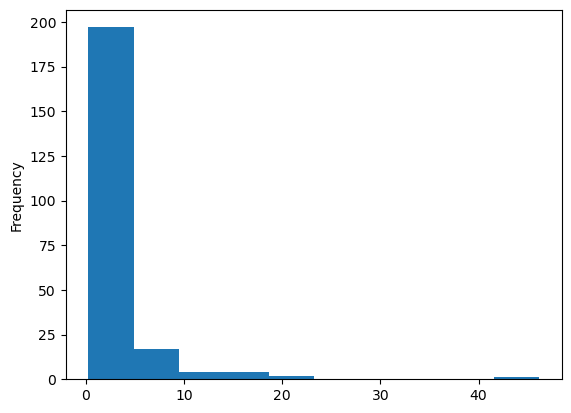

In [439]:
sickness_group_sorted.plot(kind="hist")

In [50]:
# Define the categories
categories = pd.cut(data['actualiculos'], bins=[0, 5, 10, 15, 20, float('inf')], labels=['very short stay', 'short stay', 'medium stay', 'long stay', 'very long stay'])

# Create a new column in the dataframe for the categories
data['diagnosis_category'] = categories

# Group the data by diagnosis category and get the mean length of stay for each category
mean_stay_by_category = data.groupby('diagnosis_category')['actualiculos'].mean()

print(mean_stay_by_category)

diagnosis_category
very short stay     1.761317
short stay          6.749847
medium stay        11.813558
long stay          17.535811
very long stay     28.467073
Name: actualiculos, dtype: float64


In [522]:
data[['actualiculos','diagnosis_category']].head()

,actualiculos,diagnosis_category
0,1.5625,very short stay
1,0.5506,very short stay
2,0.7784,very short stay
3,0.9506,very short stay
4,0.3305,very short stay


In [53]:
# Create a dictionary to map categories to values
category_map = {"very short stay": 1, 
                "short stay": 2, 
                "medium stay": 3,
                "long stay": 4,
                "very long stay": 5}

# Apply map function to the newly created column
data['diagnosis_category_value'] = data['diagnosis_category'].map(category_map)


In [56]:
category_map = {"Unknown": 0, 
                "I": 1, 
                "II": 2,
                "III":3,
                "IV": 4}

# Apply map function to the newly created column
data['intervention_category'] = data['physicianinterventioncategory'].map(category_map)

In [23]:
patient=pd.read_csv("patient.csv.gz", compression='gzip')

In [38]:
patient[patient["patientunitstayid"]==141765]["unitdischargeoffset"]

1    2250
Name: unitdischargeoffset, dtype: int64

In [39]:
data[data["patientunitstayid"]==141765]["actualiculos"]

0    1.5625
Name: actualiculos, dtype: float64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   patientunitstayid              1827 non-null   int64   
 1   gender                         1827 non-null   int64   
 2   bedcount                       1827 non-null   int64   
 3   admitsource                    1827 non-null   int64   
 4   graftcount                     1827 non-null   int64   
 5   age                            1754 non-null   float64 
 6   admitdiagnosis                 1816 non-null   object  
 7   thrombolytics                  1827 non-null   int64   
 8   diedinhospital                 1827 non-null   int64   
 9   hepaticfailure                 1827 non-null   int64   
 10  lymphoma                       1827 non-null   int64   
 11  metastaticcancer               1827 non-null   int64   
 12  leukemia                       182

<AxesSubplot:ylabel='Frequency'>

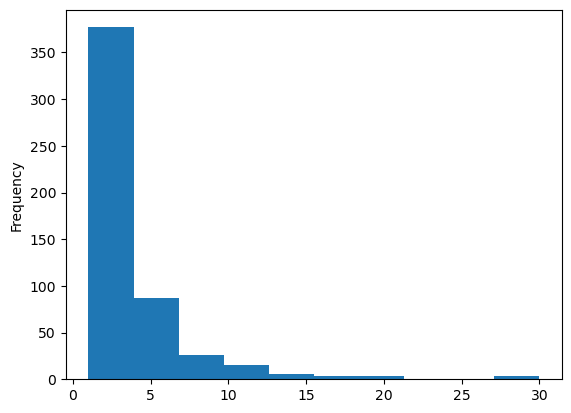

In [61]:
data["actualventdays"].plot(kind="hist")

In [62]:
import pandas as pd

# normalize the variable
ventnorm = (data['actualventdays'] - data['actualventdays'].mean()) / data['actualventdays'].std()

# clip values greater than 3 or smaller than -3
my_var_norm_clipped = ventnorm.clip(lower=-3, upper=3)

# boolean index to remove values outside of range
my_var_norm_clipped = my_var_norm_clipped[(my_var_norm_clipped >= -3) & (my_var_norm_clipped <= 3)]

# replace original column with clipped, normalized values
data['ventnorm'] = my_var_norm_clipped


<AxesSubplot:ylabel='Frequency'>

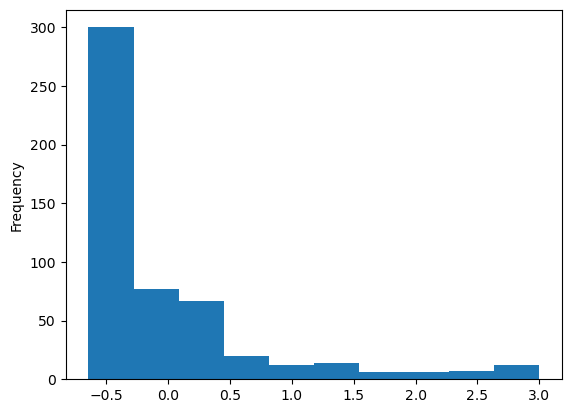

In [63]:
data['ventnorm'].plot(kind="hist")

In [64]:
data.corr()

,patientunitstayid,gender,bedcount,admitsource,graftcount,age,thrombolytics,diedinhospital,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,activetx,readmit,ima,midur,ventday1,oobventday1,oobintubday1,diabetes,ejectfx,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2,intubated,vent,dialysis,eyes_y,motor_y,verbal_y,meds_y,urine,wbc,temperature,respiratoryrate,sodium,heartrate,meanbp,ph,hematocrit,creatinine_y,albumin,pao2_y,pco2,bun,glucose,bilirubin,fio2_y,acutephysiologyscore,apachescore,actualiculos,actualhospitallos,preopmi,preopcardiaccath,ptcawithin24h,actualventdays,lentreatment,intervention_category,ventnorm
patientunitstayid,1.000000,-0.150363,0.149329,-0.017511,0.039800,0.067094,0.020516,0.032708,0.026208,0.017389,0.011569,-0.007793,0.008584,0.055691,0.037612,0.017723,0.030178,0.012357,0.042623,0.052043,0.072794,-0.038677,-0.005871,0.158651,0.048579,0.014395,-0.023510,-0.055248,-0.056815,-0.057917,-0.013030,-0.011398,0.008358,0.042623,-0.012374,-0.057917,-0.056815,-0.055248,-0.023510,0.060843,0.052104,-0.052675,-0.004585,0.052302,0.030633,0.019595,-0.024673,0.042487,0.057634,0.010164,-0.013030,-0.024055,0.081298,0.028743,0.059236,-0.011398,0.051670,0.063667,0.040799,0.061024,0.014225,-0.010258,0.027997,-0.001619,0.039374,0.168221,-0.007682
gender,-0.150363,1.000000,-0.053954,0.033092,-0.022796,0.034506,-0.035338,0.015696,-0.019383,-0.043538,0.046616,-0.006649,0.007394,-0.004029,-0.035364,-0.002069,-0.039631,-0.030994,-0.006572,-0.018202,-0.028561,0.020052,-0.033133,-0.020383,-0.009216,-0.066140,0.011024,-0.005729,0.021148,0.017100,-0.020719,-0.031253,-0.016279,-0.006572,-0.034960,0.017100,0.021148,-0.005729,0.011024,-0.090951,-0.019312,-0.026635,0.067978,-0.001955,0.060050,-0.017802,-0.017467,-0.060754,-0.056437,0.020339,-0.020719,-0.011778,-0.046547,0.003796,0.024732,-0.031253,0.058012,0.073589,-0.007203,0.012751,-0.020010,-0.028338,-0.063078,-0.015788,-0.007391,-0.095804,0.009895
bedcount,0.149329,-0.053954,1.000000,-0.045538,0.066016,0.054627,0.044693,0.034286,-0.010534,0.068144,-0.002886,0.010564,0.021438,-0.006989,0.023090,0.007991,0.011864,0.038137,0.023551,0.031588,0.054153,-0.014091,0.015709,0.032113,0.003419,0.013365,-0.019260,-0.005334,0.028605,0.012665,0.034483,0.038058,0.050334,0.023551,0.035559,0.012665,0.028605,-0.005334,-0.019260,-0.034169,0.072381,0.032173,-0.003533,0.093666,0.034517,-0.005891,0.034290,0.073446,0.087931,0.046873,0.034483,0.028886,0.078537,0.046484,0.062318,0.038058,0.097894,0.102623,0.084960,0.076265,0.027722,0.006485,-0.001218,0.065659,0.082623,0.019895,0.068768
admitsource,-0.017511,0.033092,-0.045538,1.000000,-0.006887,-0.139933,0.067056,0.011886,0.043880,-0.029134,-0.029684,0.011919,-0.011047,0.039179,-0.073332,-0.172414,-0.266802,-0.070545,-0.127438,-0.151258,-0.180582,0.061997,-0.237359,0.091187,-0.183382,0.069771,-0.004089,0.027109,0.017597,0.020048,-0.141564,-0.153618,-0.152349,-0.127438,-0.007612,0.020048,0.017597,0.027109,-0.004089,0.041550,-0.065392,-0.006779,0.048484,0.048445,0.046987,-0.029965,-0.139100,0.008903,0.062268,0.094722,-0.141564,-0.130636,0.071430,0.045153,0.028138,-0.153618,-0.003959,-0.026635,-0.079281,-0.274277,-0.105920,-0.149999,0.075555,0.000257,-0.082894,0.061342,0.048381
graftcount,0.039800,-0.022796,0.066016,-0.006887,1.000000,-0.001138,-0.000945,-0.031396,-0.000964,-0.000595,-0.001216,-0.000778,-0.001332,-0.000983,0.007209,-0.001672,0.172081,0.045308,0.015556,0.012705,0.015764,-0.023430,0.120027,0.024098,0.014072,-0.001394,-0.000119,0.004500,0.027480,0.011172,0.041370,0.014761,0.035926,0.015556,-0.001529,0.011172,0.027480,0.004500,-0.000119,0.022628,0.016767,-0.012835,0.017653,0.001872,-0.005251,-0.026617,0.037797,0.018525,-0.009289,-0.010673,0.041370,0.031816,-0.010408,-0.016111,-0.015174,0.014761,-0.043720,-0.039851,0.001674,0.023480,0.306796,0.053788,-0.001773,-0.005625,0.000613,0.033056,-0.006288
age,0.067094,0.034506,0.054627,-0.139933,-0.001138,1.000000,0.019171,0.15274

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


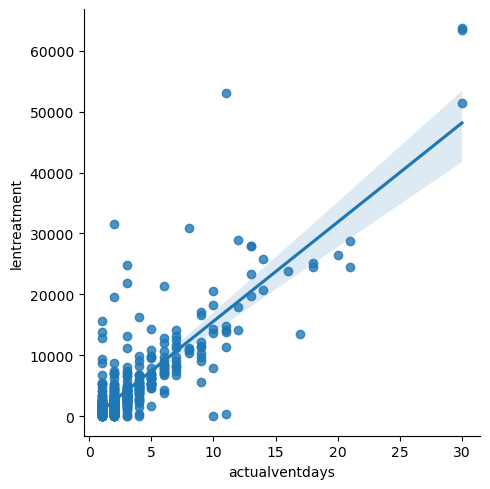

In [65]:
sns.lmplot("actualventdays","lentreatment", data=data)

In [67]:
from sklearn.linear_model import LinearRegression

# subset the data to only include rows where both variables are not missing
data_subset = data.dropna(subset=['actualventdays', 'lentreatment'])

# fit a linear regression model to predict actualventdays from lentreatment
model = LinearRegression().fit(data_subset[['lentreatment']], data_subset['actualventdays'])

# identify rows with missing values in actualventdays
missing_actualventdays = data['actualventdays'].isnull()

# use the model to predict missing values in actualventdays based on lentreatment
predicted_actualventdays = model.predict(data[missing_actualventdays][['lentreatment']])

# fill in missing values in actualventdays with predicted values
data.loc[missing_actualventdays, 'actualventdays'] = predicted_actualventdays

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 70 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   patientunitstayid              1827 non-null   int64   
 1   gender                         1827 non-null   int64   
 2   bedcount                       1827 non-null   int64   
 3   admitsource                    1827 non-null   int64   
 4   graftcount                     1827 non-null   int64   
 5   age                            1827 non-null   float64 
 6   admitdiagnosis                 1816 non-null   object  
 7   thrombolytics                  1827 non-null   int64   
 8   diedinhospital                 1827 non-null   int64   
 9   hepaticfailure                 1827 non-null   int64   
 10  lymphoma                       1827 non-null   int64   
 11  metastaticcancer               1827 non-null   int64   
 12  leukemia                       182

In [69]:
data.drop("ventnorm", axis=1, inplace=True)

In [70]:
data["age"].mean()

61.78164196123147

In [73]:
from scipy.stats import trim_mean

# Calculate the trimmed mean of "age" with 10% trim on both sides
age_trimmed_mean = trim_mean(data["age"], 0.1)

# Fill in missing values in "age" with the trimmed mean
data["age"].fillna(age_trimmed_mean, inplace=True)


In [124]:
data.columns

Index(['patientunitstayid', 'gender', 'bedcount', 'admitsource', 'graftcount',
       'age', 'admitdiagnosis', 'thrombolytics', 'diedinhospital',
       'hepaticfailure', 'lymphoma', 'metastaticcancer', 'leukemia',
       'immunosuppression', 'cirrhosis', 'activetx', 'readmit', 'ima', 'midur',
       'ventday1', 'oobventday1', 'oobintubday1', 'diabetes', 'ejectfx',
       'dischargelocation', 'visitnumber', 'amilocation', 'day1meds',
       'day1verbal', 'day1motor', 'day1eyes', 'day1pao2', 'day1fio2',
       'intubated', 'vent', 'dialysis', 'eyes_y', 'motor_y', 'verbal_y',
       'meds_y', 'urine', 'wbc', 'temperature', 'respiratoryrate', 'sodium',
       'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine_y', 'albumin',
       'pao2_y', 'pco2', 'bun', 'glucose', 'bilirubin', 'fio2_y',
       'physicianinterventioncategory', 'acutephysiologyscore', 'apachescore',
       'actualiculos', 'actualhospitallos', 'preopmi', 'preopcardiaccath',
       'ptcawithin24h', 'actualventdays', 'le

In [244]:
data['admitsource']

0       8
1       1
2       8
3       1
4       1
5       8
6       8
7       8
8       8
9       1
10      8
11      8
12      1
13      8
14      8
15      4
16      8
17      4
18      8
19      8
20      8
21      7
22      4
23      8
24      6
25      8
26      8
27      1
28      8
29      8
30      8
31      8
32      1
33      1
34      8
35      8
36      8
37      8
38      1
39      8
40      8
41      8
42      1
43      8
44      8
45      8
46      8
47      1
48      4
49      4
50      1
51      8
52      1
53      8
54      1
55      8
56      1
57      8
58      8
59     -1
60      8
61      8
62      1
63      8
64      8
65      4
66      1
67      8
68      4
69      8
70      8
71      8
72      4
73      4
74      4
75      7
76      8
77      4
78      8
79      1
80      8
81      1
82      8
83      8
84      8
85      4
86      1
87      1
88      8
89      8
90      1
91      1
92      8
93      4
94      8
95      7
96      8
97      8
98      8
99      8


In [416]:
patient=pd.read_csv("patient.csv.gz", compression='gzip')

In [417]:
patient.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141764,129391,Female,87,Caucasian,59,91,NaN,157.5,23:36:00,-2258,NaN,2015,19:20:00,366,Home,Alive,Med-Surg ICU,13:14:00,ICU to SDU,2,stepdown/other,NaN,NaN,18:58:00,344,Home,Alive,002-1039
1,141765,129391,Female,87,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",157.5,23:36:00,-8,NaN,2015,19:20:00,2616,Home,Alive,Med-Surg ICU,23:44:00,Emergency Department,1,admit,46.5,45.0,13:14:00,2250,Step-Down Unit (SDU),Alive,002-1039
2,143870,131022,Male,76,Caucasian,68,103,"Endarterectomy, carotid",167.0,20:46:00,-1,Operating Room,2014,17:05:00,1218,Home,Alive,SICU,20:47:00,Operating Room,1,admit,77.5,79.4,10:00:00,793,Floor,Alive,002-12289
3,144815,131736,Female,34,Caucasian,56,82,"Overdose, other toxin, poison or drug",172.7,01:44:00,-23,Emergency Department,2015,21:05:00,1138,Other Hospital,Alive,Med-Surg ICU,02:07:00,Emergency Department,1,admit,60.3,60.7,20:48:00,1121,Other External,Alive,002-1116
4,145427,132209,Male,61,Caucasian,68,103,"GI perforation/rupture, surgery for",177.8,23:48:00,-10,Emergency Department,2014,15:41:00,5263,Home,Alive,SICU,23:58:00,Operating Room,1,admit,91.7,93.1,22:47:00,1369,Floor,Alive,002-12243


In [418]:
patients=patient[["patientunitstayid","unittype", "unitvisitnumber","unitstaytype", "admissionweight"]]

In [421]:
len(patients["patientunitstayid"].unique())

2520

In [423]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientunitstayid  2520 non-null   int64  
 1   unittype           2520 non-null   object 
 2   unitvisitnumber    2520 non-null   int64  
 3   unitstaytype       2520 non-null   object 
 4   admissionweight    2322 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 98.6+ KB


In [424]:
final=pd.merge(data, patients, on="patientunitstayid")

In [429]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   patientunitstayid              1827 non-null   int64   
 1   gender                         1827 non-null   int64   
 2   bedcount                       1827 non-null   int64   
 3   admitsource                    1827 non-null   int64   
 4   graftcount                     1827 non-null   int64   
 5   age                            1827 non-null   float64 
 6   admitdiagnosis                 1816 non-null   object  
 7   thrombolytics                  1827 non-null   int64   
 8   diedinhospital                 1827 non-null   int64   
 9   hepaticfailure                 1827 non-null   int64   
 10  lymphoma                       1827 non-null   int64   
 11  metastaticcancer               1827 non-null   int64   
 12  leukemia                       182

<AxesSubplot:ylabel='Frequency'>

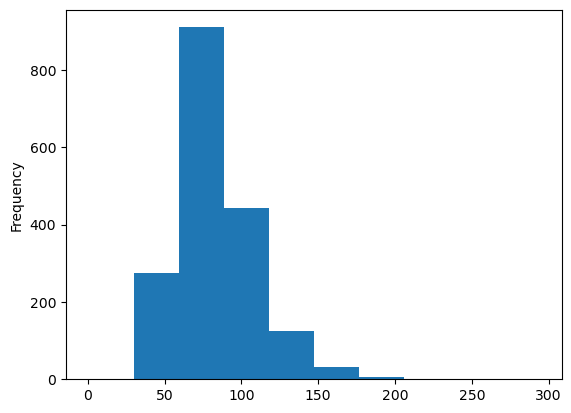

In [426]:
final["admissionweight"].plot(kind="hist")

In [428]:
final["admissionweight"].fillna(final["admissionweight"].mean(), inplace=True)

In [431]:
final["unitstaytype"].unique()

array(['admit', 'readmit', 'transfer'], dtype=object)

In [432]:
unitstaytype_encoded = pd.get_dummies(final, columns=['unitstaytype'])

In [435]:
unit_group = final.groupby('unittype')['actualiculos'].mean()
unit_group_sorted = unit_group.sort_values(ascending=False)

# Print the top 10 sickness groups with the longest ICU stay
print(unit_group_sorted.head(10))

unittype
SICU            3.383951
CTICU           3.369648
Cardiac ICU     2.704446
MICU            2.700609
Med-Surg ICU    2.644245
CCU-CTICU       2.527310
Neuro ICU       2.364639
CSICU           2.298154
Name: actualiculos, dtype: float64


In [440]:
final2=pd.get_dummies(unitstaytype_encoded, columns=['unittype'])

In [441]:
final2.head()

,patientunitstayid,gender,bedcount,admitsource,graftcount,age,admitdiagnosis,thrombolytics,diedinhospital,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,activetx,readmit,ima,midur,ventday1,oobventday1,oobintubday1,diabetes,ejectfx,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2,intubated,vent,dialysis,eyes_y,motor_y,verbal_y,meds_y,urine,wbc,temperature,respiratoryrate,sodium,heartrate,meanbp,ph,hematocrit,creatinine_y,albumin,pao2_y,pco2,bun,glucose,bilirubin,fio2_y,physicianinterventioncategory,acutephysiologyscore,apachescore,actualiculos,actualhospitallos,preopmi,preopcardiaccath,ptcawithin24h,actualventdays,lentreatment,diagnosis_category,diagnosis_category_value,intervention_category,ventdays,unitvisitnumber,admissionweight,unitstaytype_admit,unitstaytype_readmit,unitstaytype_transfer,unittype_CCU-CTICU,unittype_CSICU,unittype_CTICU,unittype_Cardiac ICU,unittype_MICU,unittype_Med-Surg ICU,unittype_Neuro ICU,unittype_SICU
0,141765,1,12,8,3,87.0,RHYTHATR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,10.2,36.2,39,139.0,88,108,-1.0,37.8,1.04,-1.0,-1.0,-1.0,28.0,61,-1.0,-1,Unknown,23,47,1.5625,1.8222,0,0,0,1.669202,871,very short stay,1,0,2.0,1,46.5,1,0,0,0,0,0,0,0,1,0,0
1,143870,0,14,1,3,76.0,S-CAROTEND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,11.7,36.4,60,133.0,40,47,-1.0,34.1,1.14,-1.0,-1.0,-1.0,14.0,140,-1.0,-1,Unknown,43,60,0.5506,0.8465,0,0,0,1.293577,3,very short stay,1,0,1.0,1,77.5,1,0,0,0,0,0,0,0,0,0,1
2,144815,1,8,8,3,34.0,ODOTHER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,8,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,7.9,36.7,6,141.0,131,61,-1.0,36.6,0.63,3.6,-1.0,-1.0,6.0,82,0.5,-1,I,25,25,0.7784,0.8063,0,0,0,1.404793,260,very short stay,1,1,1.0,1,60.3,1,0,0,0,0,0,0,0,1,0,0
3,145427,0,14,1,3,61.0,S-GIPERFOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,21.1,36.2,41,141.0,49,72,-1.0,40.4,1.05,-1.0,-1.0,-1.0,14.0,118,-1.0,-1,Unknown,26,37,0.9506,3.6618,0,0,0,1.346373,125,very short stay,1,0,1.0,1,91.7,1,0,0,0,0,0,0,0,0,0,1
4,147307,1,43,1,3,55.0,S-CAROTEND,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4,1,-1,0,5,6,4,-1.0,-1,0,0,0,4,6,5,0,-1.0,-1.0,36.8,33,-1.0,115,107,-1.0,-1.0,-1.00,-1.0,-1.0,-1.0,-1.0,-1,-1.0,-1,Unknown,15,20,0.3305,0.7674,0,0,0,1.292279,0,very short stay,1,0,1.0,1,72.5,1,0,0,0,0,0,0,0,1,0,0


In [442]:
final2.columns

Index(['patientunitstayid', 'gender', 'bedcount', 'admitsource', 'graftcount',
       'age', 'admitdiagnosis', 'thrombolytics', 'diedinhospital',
       'hepaticfailure', 'lymphoma', 'metastaticcancer', 'leukemia',
       'immunosuppression', 'cirrhosis', 'activetx', 'readmit', 'ima', 'midur',
       'ventday1', 'oobventday1', 'oobintubday1', 'diabetes', 'ejectfx',
       'dischargelocation', 'visitnumber', 'amilocation', 'day1meds',
       'day1verbal', 'day1motor', 'day1eyes', 'day1pao2', 'day1fio2',
       'intubated', 'vent', 'dialysis', 'eyes_y', 'motor_y', 'verbal_y',
       'meds_y', 'urine', 'wbc', 'temperature', 'respiratoryrate', 'sodium',
       'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine_y', 'albumin',
       'pao2_y', 'pco2', 'bun', 'glucose', 'bilirubin', 'fio2_y',
       'physicianinterventioncategory', 'acutephysiologyscore', 'apachescore',
       'actualiculos', 'actualhospitallos', 'preopmi', 'preopcardiaccath',
       'ptcawithin24h', 'actualventdays', 'le

In [451]:
X=final2.drop(["patientunitstayid","actualiculos","admitdiagnosis","physicianinterventioncategory", 'diagnosis_category',
            'diedinhospital','ejectfx', 'actualhospitallos'], axis=1)
y=final2["actualiculos"]

In [452]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

#g_boost = GradientBoostingRegressor()
#svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)


# create a recursive feature elimination object with cross-validation
rfe = RFE(estimator=rf_model, step=1)

In [453]:
# fit the RFE object to the data
rfe.fit(X, y)

# print the selected feature names
print("Selected Features:", X.columns[rfe.support_])

Selected Features: Index(['gender', 'bedcount', 'admitsource', 'age', 'amilocation', 'day1meds',
       'day1verbal', 'day1motor', 'day1pao2', 'day1fio2', 'motor_y',
       'verbal_y', 'urine', 'wbc', 'temperature', 'respiratoryrate', 'sodium',
       'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine_y', 'albumin',
       'pco2', 'bun', 'glucose', 'bilirubin', 'acutephysiologyscore',
       'apachescore', 'actualventdays', 'lentreatment',
       'diagnosis_category_value', 'intervention_category', 'ventdays',
       'unitvisitnumber', 'admissionweight', 'unittype_MICU', 'unittype_SICU'],
      dtype='object')


In [516]:
X=final2[['gender', 'bedcount', 'admitsource', 'age', 'amilocation', 'day1meds',
       'day1verbal', 'day1motor', 'day1pao2', 'day1fio2', 'motor_y',
       'verbal_y', 'urine', 'wbc', 'temperature', 'respiratoryrate', 'sodium',
       'heartrate', 'meanbp', 'ph', 'hematocrit', 'creatinine_y', 'albumin',
       'pco2', 'bun', 'glucose', 'hepaticfailure', 'preopmi', 'graftcount','bilirubin', 'acutephysiologyscore',
       'apachescore', 'actualventdays', 'lentreatment',
       'diagnosis_category_value', 'intervention_category',
       'unitvisitnumber', 'admissionweight', 'unittype_MICU', 'unittype_SICU', 'unitstaytype_readmit']]
y=final2["actualiculos"]

In [526]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1827 entries, 0 to 1826
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    1827 non-null   int64   
 1   bedcount                  1827 non-null   int64   
 2   admitsource               1827 non-null   int64   
 3   age                       1827 non-null   float64 
 4   amilocation               1827 non-null   int64   
 5   day1meds                  1827 non-null   int64   
 6   day1verbal                1827 non-null   int64   
 7   day1motor                 1827 non-null   int64   
 8   day1pao2                  1827 non-null   float64 
 9   day1fio2                  1827 non-null   int64   
 10  motor_y                   1827 non-null   int64   
 11  verbal_y                  1827 non-null   int64   
 12  urine                     1827 non-null   float64 
 13  wbc                       1827 non-null   float6

In [445]:
X["immunosuppression"].value_counts()

0    1778
1      49
Name: immunosuppression, dtype: int64

In [518]:
from sklearn.model_selection import train_test_split

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [520]:
from sklearn.ensemble import RandomForestRegressor

# create the random forest regressor model
    
#rf_model = RandomForestRegressor(n_estimators=140, max_depth=10, random_state=42,
                               #  min_samples_leaf=1, bootstrap=True, min_samples_split=5, warm_start=True)
    
rf_model = RandomForestRegressor(n_estimators=188, max_depth=30, random_state=42,
                                min_samples_leaf=1, bootstrap=False, min_samples_split=2)

    

# fit the model to the training data
rf_model.fit(X_train, np.sqrt(y_train))

RandomForestRegressor(bootstrap=False, max_depth=30, n_estimators=188,
                      random_state=42)

In [533]:
feature_importances = rfe.ranking_

# Create a pandas DataFrame with the feature importances
df_feature_importances = pd.DataFrame(list(zip(X.columns, feature_importances)), 
                                      columns=['Feature', 'Importance'])

# Sort the DataFrame by feature importance in descending order
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)

# Print the DataFrame
df_feature_importances.head(10)

,Feature,Importance
15,respiratoryrate,39
8,day1pao2,34
16,sodium,33
9,day1fio2,30
10,motor_y,28
3,age,27
6,day1verbal,26
14,temperature,25
5,day1meds,24
7,day1motor,23


In [521]:
from sklearn.metrics import mean_squared_error
y_pred = rf_model.predict(X_test)
y_pred=y_pred**2

# evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 0.885569067287199


In [509]:
24*0.885569067287199

21.253657614892774

In [527]:
R2=1-(sum((y_test-y_pred)**2)/sum((y_test-np.mean(y_test))**2))

In [528]:
R2

0.9511442429702995

In [534]:
resid=y_test-y_pred

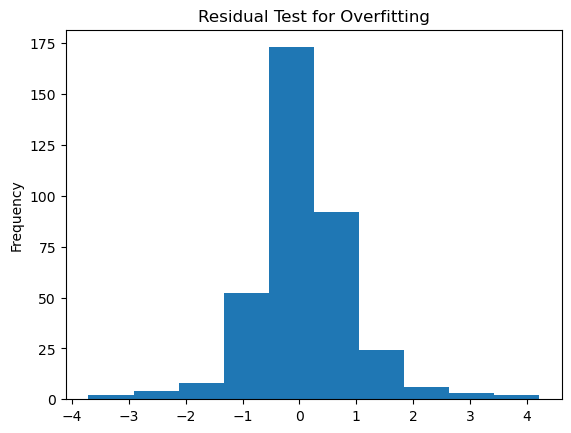

In [540]:
g=resid.plot(kind="hist", title="Residual Test for Overfitting")

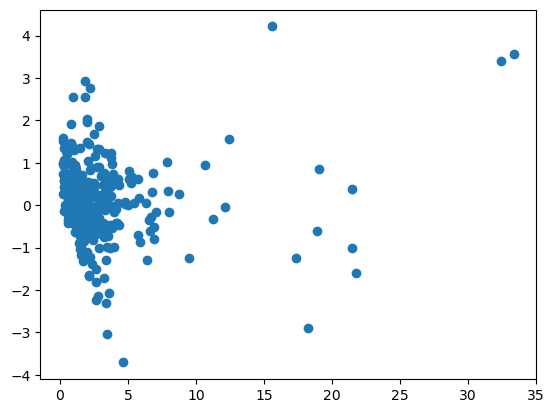

In [539]:
plt.scatter(y_pred, resid)

In [541]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation method
kf = KFold(n_splits=num_folds)

# Calculate R2 score using cross-validation
r2_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')

# Calculate the average R2 score across all folds
avg_r2_score = np.mean(r2_scores)

print("R2 score with cross-validation: ", avg_r2_score)

R2 score with cross-validation:  0.9022364995212373


Text(0.5, 1.0, 'Overlapped distribution histogram of true vs predicted values')

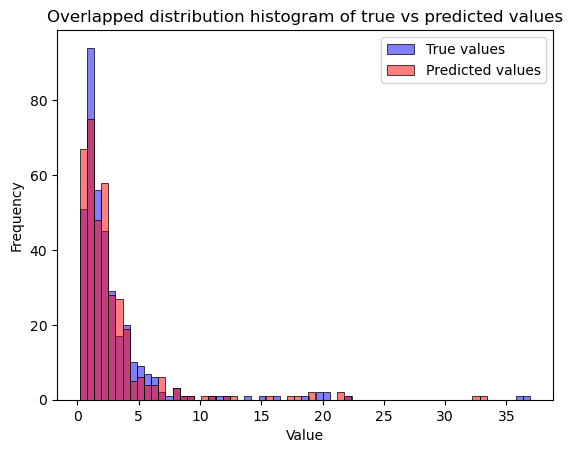

In [546]:
sns.histplot(y_test, color='blue', alpha=0.5, label='True values')
sns.histplot(y_pred, color='red', alpha=0.5, label='Predicted values')
plt.legend()

# Add axis labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Overlapped distribution histogram of true vs predicted values')

In [79]:
#################

In [278]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']


# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 11)]
max_depth.append(None)


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]


# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

bootstrap=[True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
                }
print(random_grid)

{'n_estimators': [100, 111, 122, 133, 144, 155, 166, 177, 188, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 8, 12, 15, 19, 22, 26, 29, 33, 36, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [279]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 8, 12, 15, 19, 22, 26,
                                                      29, 33, 36, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 111, 122, 133,
                                                         144, 155, 166, 177,
                                                         188, 200]},
                   random_state=42, verbose=2)

In [280]:
rf_random.best_params_

{'n_estimators': 144,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': False}

In [116]:
#data["ventdays"]=np.round(data["actualventdays"])

In [344]:
from sklearn.feature_selection import RFECV

rf = RandomForestRegressor()

# Use RFECV to select the optimal subset of features
selector = RFECV(rf, cv=5)
selector.fit(X, y)

# Print the selected features
print(selector.support_)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False  True  True  True False False]


In [349]:
len(selector.support_)

66

In [350]:
len(X.columns)

66

In [346]:
X.columns

Index(['gender', 'bedcount', 'admitsource', 'graftcount', 'age',
       'thrombolytics', 'diedinhospital', 'hepaticfailure', 'lymphoma',
       'metastaticcancer', 'leukemia', 'immunosuppression', 'cirrhosis',
       'activetx', 'readmit', 'ima', 'midur', 'ventday1', 'oobventday1',
       'oobintubday1', 'diabetes', 'ejectfx', 'dischargelocation',
       'visitnumber', 'amilocation', 'day1meds', 'day1verbal', 'day1motor',
       'day1eyes', 'day1pao2', 'day1fio2', 'intubated', 'vent', 'dialysis',
       'eyes_y', 'motor_y', 'verbal_y', 'meds_y', 'urine', 'wbc',
       'temperature', 'respiratoryrate', 'sodium', 'heartrate', 'meanbp', 'ph',
       'hematocrit', 'creatinine_y', 'albumin', 'pao2_y', 'pco2', 'bun',
       'glucose', 'bilirubin', 'fio2_y', 'acutephysiologyscore', 'apachescore',
       'actualhospitallos', 'preopmi', 'preopcardiaccath', 'ptcawithin24h',
       'actualventdays', 'lentreatment', 'diagnosis_category_value',
       'intervention_category', 'ventdays'],
      dty

In [351]:
selector.get_feature_names_out(X.columns)

array(['actualhospitallos', 'actualventdays', 'lentreatment',
       'diagnosis_category_value'], dtype=object)